In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('e-shop clothing 2008.csv', sep=';', encoding='latin1')

In [3]:
print("First few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

First few rows:
   year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  
2        1     1  
3        2     1  

In [4]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())



Missing values before cleaning:
year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [6]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

Duplicate rows: 0


In [7]:
print("Original dataset shape:", df.shape)
print("First few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Original dataset shape: (165474, 14)
First few rows:
   year  month  day  order  country  session ID  page 1 (main category)  \
0  2008      4    1      1       29           1                       1   
1  2008      4    1      2       29           1                       1   
2  2008      4    1      3       29           1                       2   
3  2008      4    1      4       29           1                       2   
4  2008      4    1      5       29           1                       2   

  page 2 (clothing model)  colour  location  model photography  price  \
0                     A13       1         5                  1     28   
1                     A16       1         6                  1     33   
2                      B4      10         2                  1     52   
3                     B17       6         6                  2     38   
4                      B8       4         3                  2     52   

   price 2  page  
0        2     1  
1        2     1  


In [8]:
df['page'] = df['page'].fillna(0)

In [9]:
clean_columns = [col.strip().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]
df.columns = clean_columns

In [10]:


print("\nCleaned column names:")
print(df.columns.tolist())


Cleaned column names:
['year', 'month', 'day', 'order', 'country', 'session_ID', 'page_1_main_category', 'page_2_clothing_model', 'colour', 'location', 'model_photography', 'price', 'price_2', 'page']


In [11]:
numeric_columns = ['year', 'month', 'day', 'order', 'country', 'session_ID', 
                  'colour', 'location', 'model_photography', 'price', 'price_2', 'page']

In [12]:
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Step 5: Handle categorical columns
categorical_columns = ['page_1_main_category', 'page_2_clothing_model']

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')


In [13]:
print("\nFinal dataset info:")
print(df.info())

print("\nData types after cleaning:")
print(df.dtypes)


Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   year                   165474 non-null  int64   
 1   month                  165474 non-null  int64   
 2   day                    165474 non-null  int64   
 3   order                  165474 non-null  int64   
 4   country                165474 non-null  int64   
 5   session_ID             165474 non-null  int64   
 6   page_1_main_category   165474 non-null  category
 7   page_2_clothing_model  165474 non-null  category
 8   colour                 165474 non-null  int64   
 9   location               165474 non-null  int64   
 10  model_photography      165474 non-null  int64   
 11  price                  165474 non-null  int64   
 12  price_2                165474 non-null  int64   
 13  page                   165474 non-null  int64   
dtyp

In [14]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nUnique values in categorical columns:")
if 'page_1_main_category' in df.columns:
    print("Page 1 categories:", df['page_1_main_category'].unique())
if 'page_2_clothing_model' in df.columns:
    print("Page 2 models:", df['page_2_clothing_model'].unique())


Missing values after cleaning:
year                     0
month                    0
day                      0
order                    0
country                  0
session_ID               0
page_1_main_category     0
page_2_clothing_model    0
colour                   0
location                 0
model_photography        0
price                    0
price_2                  0
page                     0
dtype: int64

Unique values in categorical columns:
Page 1 categories: [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Page 2 models: ['A13', 'A16', 'B4', 'B17', 'B8', ..., 'P45', 'P54', 'P28', 'P22', 'P79']
Length: 217
Categories (217, object): ['A1', 'A10', 'A11', 'A12', ..., 'P80', 'P81', 'P82', 'P9']


In [15]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.weekday >= 5


In [16]:
print("\nFinal cleaned dataset:")
print(df.head())
print("\nFinal shape:", df.shape)


Final cleaned dataset:
   year  month  day  order  country  session_ID page_1_main_category  \
0  2008      4    1      1       29           1                    1   
1  2008      4    1      2       29           1                    1   
2  2008      4    1      3       29           1                    2   
3  2008      4    1      4       29           1                    2   
4  2008      4    1      5       29           1                    2   

  page_2_clothing_model  colour  location  model_photography  price  price_2  \
0                   A13       1         5                  1     28        2   
1                   A16       1         6                  1     33        2   
2                    B4      10         2                  1     52        1   
3                   B17       6         6                  2     38        2   
4                    B8       4         3                  2     52        1   

   page       date day_of_week  is_weekend  
0     1 2008-04-0

In [17]:
df.to_csv('clickstream_cleaned.csv', index=False)
print("Cleaned dataset saved as 'clickstream_cleaned.csv'")

Cleaned dataset saved as 'clickstream_cleaned.csv'


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the cleaned clickstream dataset
df = pd.read_csv('clickstream_cleaned.csv')

print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   year                   165474 non-null  int64 
 1   month                  165474 non-null  int64 
 2   day                    165474 non-null  int64 
 3   order                  165474 non-null  int64 
 4   country                165474 non-null  int64 
 5   session_ID             165474 non-null  int64 
 6   page_1_main_category   165474 non-null  int64 
 7   page_2_clothing_model  165474 non-null  object
 8   colour                 165474 non-null  int64 
 9   location               165474 non-null  int64 
 10  model_photography      165474 non-null  int64 
 11  price                  165474 non-null  int64 
 12  price_2                165474 non-null  int64 
 13  page                   165474 non-null  int64 
 14  date                   165474 non-null

In [20]:
print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(20, 20))


Basic Statistics:
           year          month            day          order        country  \
count  165474.0  165474.000000  165474.000000  165474.000000  165474.000000   
mean     2008.0       5.585887      14.524554       9.817476      26.952621   
std         0.0       1.328160       8.830374      13.478411       7.150691   
min      2008.0       4.000000       1.000000       1.000000       1.000000   
25%      2008.0       4.000000       7.000000       2.000000      29.000000   
50%      2008.0       5.000000      14.000000       6.000000      29.000000   
75%      2008.0       7.000000      22.000000      12.000000      29.000000   
max      2008.0       8.000000      31.000000     195.000000      47.000000   

          session_ID  page_1_main_category         colour       location  \
count  165474.000000         165474.000000  165474.000000  165474.000000   
mean    12058.417056              2.400842       6.227655       3.258198   
std      7008.418903              1.14442

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

C:\Users\sampa\AppData\Local\Temp\ipykernel_8944\2659754275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='month', palette='viridis')


Text(0, 0.5, 'Number of Clicks')

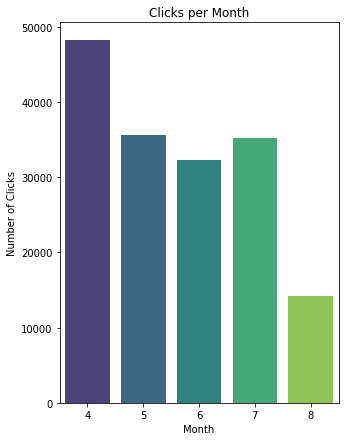

In [21]:
# plt.subplot(2, 3, 1)
plt.figure(figsize=(5, 7))
sns.countplot(data=df, x='month', palette='viridis')
plt.title('Clicks per Month')
plt.xlabel('Month')
plt.ylabel('Number of Clicks')

C:\Users\sampa\AppData\Local\Temp\ipykernel_8944\567233429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '3'),
  Text(1, 0, '9'),
  Text(2, 0, '16'),
  Text(3, 0, '21'),
  Text(4, 0, '24'),
  Text(5, 0, '29'),
  Text(6, 0, '34'),
  Text(7, 0, '41'),
  Text(8, 0, '44'),
  Text(9, 0, '46')])

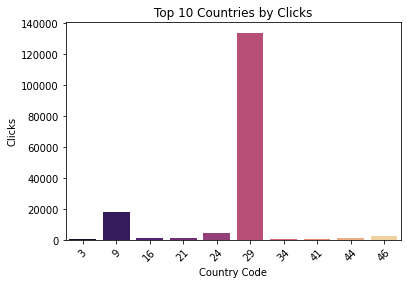

In [22]:
# 2. Top 10 countries by clicks
# plt.subplot(2, 3, 2)
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title('Top 10 Countries by Clicks')
plt.xlabel('Country Code')
plt.ylabel('Clicks')
plt.xticks(rotation=45)

C:\Users\sampa\AppData\Local\Temp\ipykernel_8944\3119097180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='page_1_main_category',


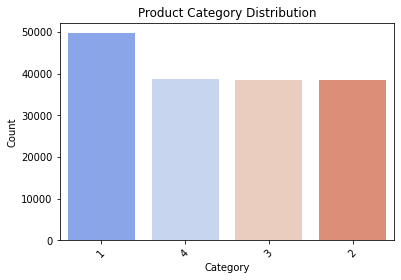

In [23]:
if 'page_1_main_category' in df.columns:
    sns.countplot(data=df, x='page_1_main_category', 
                 order=df['page_1_main_category'].value_counts().index, 
                 palette='coolwarm')
    plt.title('Product Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

Text(0, 0.5, 'Frequency')

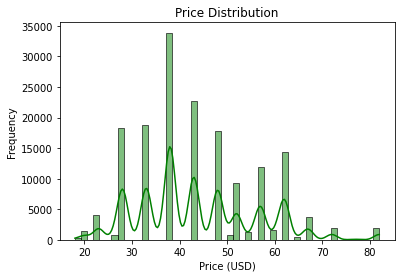

In [24]:
# 4. Price distribution
# plt.subplot(2, 3, 4)
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

C:\Users\sampa\AppData\Local\Temp\ipykernel_8944\1581783179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=day_order, palette='plasma')


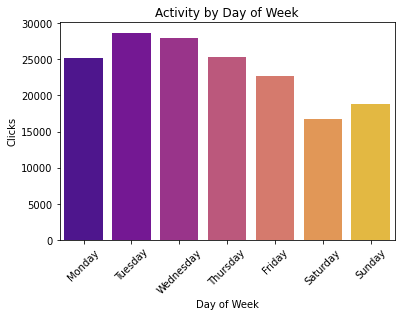

In [25]:
# 5. Day of week activity
# plt.subplot(2, 3, 5)
if 'day_of_week' in df.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.countplot(data=df, x='day_of_week', order=day_order, palette='plasma')
    plt.title('Activity by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Clicks')
    plt.xticks(rotation=45)



C:\Users\sampa\AppData\Local\Temp\ipykernel_8944\1280669386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='location', palette='spring')


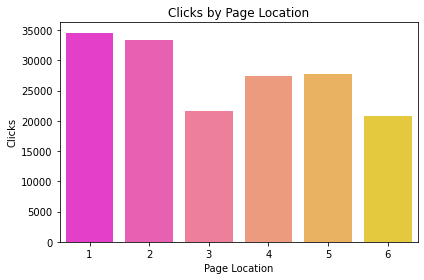

In [26]:
# 6. Location on page clicks
# plt.subplot(2, 3, 6)
sns.countplot(data=df, x='location', palette='spring')
plt.title('Clicks by Page Location')
plt.xlabel('Page Location')
plt.ylabel('Clicks')

plt.tight_layout()
plt.show()

In [27]:
df["session_ID"].describe
# df.head(10)

<bound method NDFrame.describe of 0             1
1             1
2             1
3             1
4             1
          ...  
165469    24024
165470    24025
165471    24026
165472    24026
165473    24026
Name: session_ID, Length: 165474, dtype: int64>

In [28]:
print("\n=== SESSION ANALYSIS ===")
session_stats = df.groupby('session_ID').agg({
    'order': ['count', 'max', 'std'],
    'price': ['mean', 'sum', 'std'],
    'page': 'nunique',
    'location': 'nunique'
}).reset_index()

# Flatten column names
session_stats.columns = ['session_id', 'clicks_per_session', 'max_order', 'order_std',
                        'avg_price_per_click', 'total_session_value', 'price_std',
                        'unique_pages_visited', 'unique_locations_clicked']

print("Session Statistics:")
print(session_stats.describe())


=== SESSION ANALYSIS ===
Session Statistics:
        session_id  clicks_per_session     max_order     order_std  \
count  24026.00000        24026.000000  24026.000000  18984.000000   
mean   12013.50000            6.887289      6.887289      2.576832   
std     6935.85312            8.995161      8.995161      2.752890   
min        1.00000            1.000000      1.000000      0.707107   
25%     6007.25000            2.000000      2.000000      1.000000   
50%    12013.50000            4.000000      4.000000      1.581139   
75%    18019.75000            8.000000      8.000000      3.027650   
max    24026.00000          195.000000    195.000000     56.435804   

       avg_price_per_click  total_session_value     price_std  \
count         24026.000000         24026.000000  18984.000000   
mean             44.374906           301.680513     10.691078   
std               8.454850           387.676774      5.048991   
min              18.000000            18.000000      0.000000  

In [29]:
session_stats.head(10)

,session_id,clicks_per_session,max_order,order_std,avg_price_per_click,total_session_value,price_std,unique_pages_visited,unique_locations_clicked
0,1,9,9,2.738613,42.111111,379,10.313152,3,6
1,2,10,10,3.027650,50.000000,500,10.381608,2,6
2,3,6,6,1.870829,42.166667,253,8.010410,2,4
3,4,4,4,1.290994,45.250000,181,12.789970,3,4
4,5,1,1,NaN,57.000000,57,NaN,1,1
5,6,5,5,1.581139,42.800000,214,9.628084,3,3
6,7,11,11,3.316625,37.818182,416,11.276686,4,4
7,8,9,9,2.738613,37.888889,341,12.888410,3,4
8,9,3,3,1.000000,41.000000,123,14.730920,2,3
9,10,5,5,1.581139,45.400000,227,12.033287,1,3


In [30]:
# User Behavior Classification
def classify_user_behavior(row):
    if row['clicks_per_session'] <= 5:
        return 'Browser'
    elif row['clicks_per_session'] <= 15:
        return 'Explorer'
    else:
        return 'Deep_Researcher'

session_stats['user_type'] = session_stats.apply(classify_user_behavior, axis=1)

In [31]:
print("\nUser Behavior Distribution:")
print(session_stats['user_type'].value_counts())
print(session_stats['user_type'].value_counts(normalize=True) * 100)


User Behavior Distribution:
user_type
Browser            14616
Explorer            6939
Deep_Researcher     2471
Name: count, dtype: int64
user_type
Browser            60.834096
Explorer           28.881212
Deep_Researcher    10.284692
Name: proportion, dtype: float64


In [32]:
print("\n=== ADVANCED ANALYTICS ===")

# Conversion Analysis (sessions with purchases)
purchasing_sessions = session_stats[session_stats['total_session_value'] > 0]
conversion_rate = len(purchasing_sessions) / len(session_stats) * 100

print(f"Conversion Rate: {conversion_rate:.2f}%")
if len(purchasing_sessions) > 0:
    print(f"Average Order Value: ${purchasing_sessions['total_session_value'].mean():.2f}")


=== ADVANCED ANALYTICS ===
Conversion Rate: 100.00%
Average Order Value: $301.68


In [33]:
# Temporal Analysis
if 'date' in df.columns:
    daily_activity = df.groupby('date').size()
    print(f"Most Active Day: {daily_activity.idxmax()} with {daily_activity.max()} clicks")
    print(f"Least Active Day: {daily_activity.idxmin()} with {daily_activity.min()} clicks")

Most Active Day: 2008-04-02 with 3456 clicks
Least Active Day: 2008-08-13 with 200 clicks


In [34]:
# Product Performance
if 'page_2_clothing_model' in df.columns:
    product_performance = df.groupby('page_2_clothing_model').agg({
        'session_ID': 'nunique',
        'price': 'mean'
    }).sort_values('session_ID', ascending=False)
    print("\nTop 5 Products by Unique Sessions:")
    print(product_performance.head())

# Geographic Analysis
geo_analysis = df.groupby('country').agg({
    'session_ID': 'nunique',
    'order': 'count',
    'price': ['mean', 'sum']
}).round(2)

geo_analysis.columns = ['unique_sessions', 'total_clicks', 'avg_price', 'total_revenue']
geo_analysis = geo_analysis.sort_values('total_clicks', ascending=False)

print("\nTop 10 Countries Performance:")
print(geo_analysis.head(10))



Top 5 Products by Unique Sessions:
                       session_ID  price
page_2_clothing_model                   
B4                           3212   52.0
A2                           2557   43.0
A11                          2454   62.0
B10                          2415   67.0
P1                           2266   38.0

Top 10 Countries Performance:
         unique_sessions  total_clicks  avg_price  total_revenue
country                                                         
29                 19582        133963      43.47        5823451
9                   2261         18003      45.92         826722
24                   527          4091      43.93         179725
46                   681          2522      45.09         113720
44                   240          1385      44.53          61680
16                   101           834      44.33          36968
21                   102           811      42.85          34753
34                    88           716      45.72          32


=== SUMMARY STATISTICS ===
Total Sessions: 24,026
Total Clicks: 165,474
Average Clicks per Session: 6.89
Average Product Price: $43.80
Total Revenue: $7248176.00
Unique Countries: 47
Unique Products: 217

=== CORRELATION ANALYSIS ===


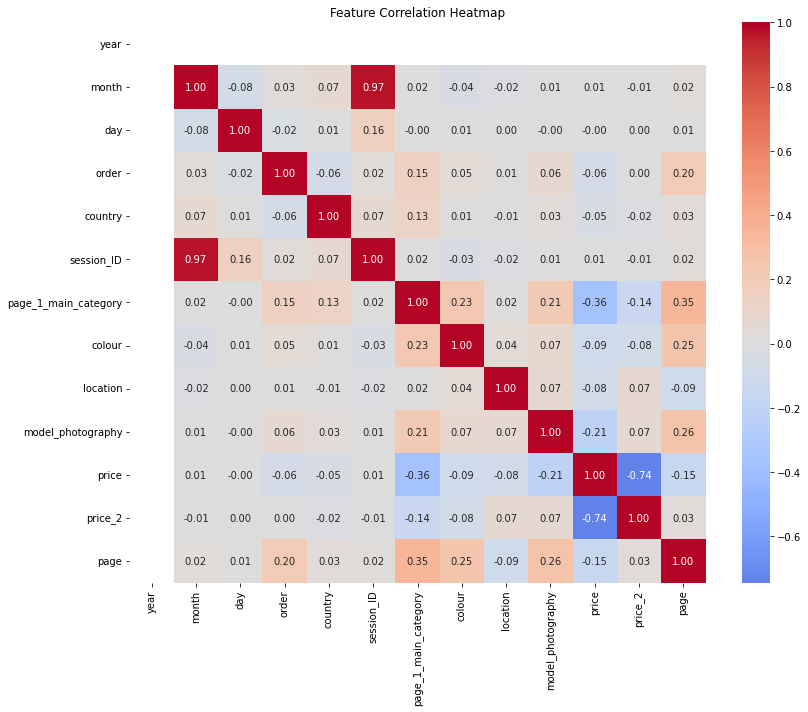

High Correlations (|r| > 0.5):
month - session_ID: 0.971
price - price_2: -0.744

Analysis complete! Files saved:
- session_analysis.csv
- geographic_analysis.csv


In [35]:
# Summary Statistics
print("\n=== SUMMARY STATISTICS ===")
total_sessions = df['session_ID'].nunique()
total_clicks = len(df)
avg_clicks_per_session = total_clicks / total_sessions
avg_price = df['price'].mean()
total_revenue = df['price'].sum()
unique_countries = df['country'].nunique()
unique_products = df['page_2_clothing_model'].nunique() if 'page_2_clothing_model' in df.columns else 0

print(f"Total Sessions: {total_sessions:,}")
print(f"Total Clicks: {total_clicks:,}")
print(f"Average Clicks per Session: {avg_clicks_per_session:.2f}")
print(f"Average Product Price: ${avg_price:.2f}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Unique Countries: {unique_countries}")
print(f"Unique Products: {unique_products}")

# Correlation Analysis
print("\n=== CORRELATION ANALYSIS ===")
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# High correlations
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                  correlation_matrix.columns[j], 
                                  corr_val))

print("High Correlations (|r| > 0.5):")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Save processed results
session_stats.to_csv('session_analysis.csv', index=False)
geo_analysis.to_csv('geographic_analysis.csv', index=False)

print("\nAnalysis complete! Files saved:")
print("- session_analysis.csv")
print("- geographic_analysis.csv")

MACHINE LEARNING APPLICATIONS

Target Distribution:
high_engagement
0    14827
1     9199
Name: count, dtype: int64

Training set size: (16818, 8)
Test set size: (7208, 8)

=== Training Stacking Ensemble Model ===

=== Model Performance ===
Accuracy: 1.0000
ROC-AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4448
           1       1.00      1.00      1.00      2760

    accuracy                           1.00      7208
   macro avg       1.00      1.00      1.00      7208
weighted avg       1.00      1.00      1.00      7208



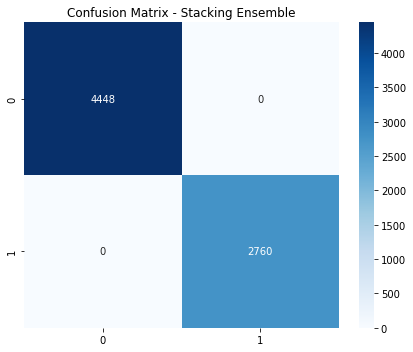


Cross-Validation Accuracy: 1.0000 (+/- 0.0000)

=== Individual Model Accuracies ===
RF: 1.0000
GB: 1.0000
STACKING: 1.0000


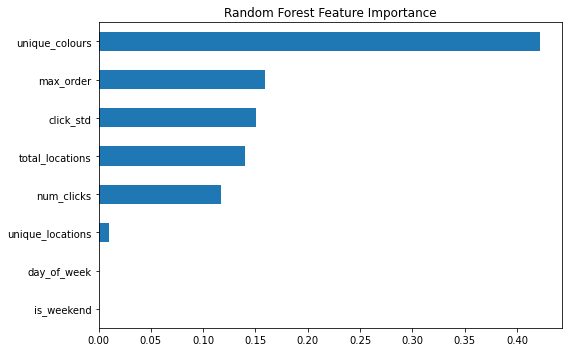

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('clickstream_cleaned.csv')

# Feature Engineering - date and behavior features
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = (df['date'].dt.weekday >= 5).astype(int)

# Session-level behavioral features only (NO price_sum, NO avg_price, NO price-based columns)
session_features = df.groupby('session_ID').agg({
    'order': ['count', 'max', 'std'],
    'location': ['nunique', 'count'],
    'colour': 'nunique',
    'day_of_week': 'first',
    'is_weekend': 'first'
}).reset_index()

# Clean column names
session_features.columns = [
    'session_ID', 'num_clicks', 'max_order', 'click_std',
    'unique_locations', 'total_locations', 'unique_colours',
    'day_of_week', 'is_weekend'
]

# Fill NaN values in std
session_features['click_std'] = session_features['click_std'].fillna(0)

# Create a *behavioral* target: High engagement (more than median clicks and more than median product diversity)
median_clicks = session_features['num_clicks'].median()
median_colours = session_features['unique_colours'].median()
session_features['high_engagement'] = (
    (session_features['num_clicks'] > median_clicks) &
    (session_features['unique_colours'] > median_colours)
).astype(int)

print("Target Distribution:")
print(session_features['high_engagement'].value_counts())

# Features to use: strictly behavior, NO price, NO target leakage
feature_columns = [
    'num_clicks', 'max_order', 'click_std', 'unique_locations',
    'total_locations', 'unique_colours', 'day_of_week', 'is_weekend'
]
X = session_features[feature_columns]
y = session_features['high_engagement']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Base learners for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)),
]

# Meta learner
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# Create stacking ensemble (now with no leakage!)
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1
)

print("\n=== Training Stacking Ensemble Model ===")
stacking_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = stacking_model.predict(X_test_scaled)
y_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]

print("\n=== Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Stacking Ensemble')
plt.tight_layout()
plt.show()

# Cross-validation for better estimate
cv_scores = cross_val_score(stacking_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Individual model performance
print("\n=== Individual Model Accuracies ===")
for name, model in base_learners:
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    print(f"{name.upper()}: {acc:.4f}")

print(f"STACKING: {accuracy_score(y_test, y_pred):.4f}")

# Feature Importances - from Random Forest
rf_model = base_learners[0][1]
rf_model.fit(X_train_scaled, y_train)
imp = pd.Series(rf_model.feature_importances_, index=feature_columns)
imp.sort_values().plot.barh(figsize=(8, 5), title='Random Forest Feature Importance')
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = session_stats.copy()

print(f"Total sessions: {len(df)}")
print(f"Columns: {df.columns.tolist()}")
print(df.head())


Total sessions: 24026
Columns: ['session_id', 'clicks_per_session', 'max_order', 'order_std', 'avg_price_per_click', 'total_session_value', 'price_std', 'unique_pages_visited', 'unique_locations_clicked', 'user_type']
   session_id  clicks_per_session  max_order  order_std  avg_price_per_click  \
0           1                   9          9   2.738613            42.111111   
1           2                  10         10   3.027650            50.000000   
2           3                   6          6   1.870829            42.166667   
3           4                   4          4   1.290994            45.250000   
4           5                   1          1        NaN            57.000000   

   total_session_value  price_std  unique_pages_visited  \
0                  379  10.313152                     3   
1                  500  10.381608                     2   
2                  253   8.010410                     2   
3                  181  12.789970                     3   
4     

In [38]:
# Use only behavioral features (NOT price-based)
features = [
    'clicks_per_session',
    'max_order',
    'order_std',
    'unique_pages_visited',
    'unique_locations_clicked'
]

X = df[features].replace([np.inf, -np.inf], np.nan).fillna(0)

# Target: Actual total session value (REGRESSION)
y = df['total_session_value'].copy()

print(f"Features: {features}")
print(f"Target statistics:")
print(f"  Mean: {y.mean():.2f}")
print(f"  Std: {y.std():.2f}")
print(f"  Min: {y.min():.2f}")
print(f"  Max: {y.max():.2f}")
print(f"  Median: {y.median():.2f}")

# Check distribution
y.describe()


Features: ['clicks_per_session', 'max_order', 'order_std', 'unique_pages_visited', 'unique_locations_clicked']
Target statistics:
  Mean: 301.68
  Std: 387.68
  Min: 18.00
  Max: 8538.00
  Median: 177.00


count    24026.000000
mean       301.680513
std        387.676774
min         18.000000
25%         76.000000
50%        177.000000
75%        375.000000
max       8538.000000
Name: total_session_value, dtype: float64

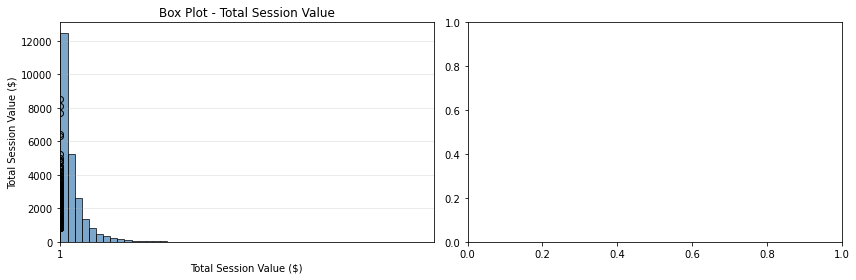

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(y, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Distribution of Total Session Value')
axes[0].set_xlabel('Total Session Value ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

axes[0].boxplot(y, vert=True)
axes[0].set_title('Box Plot - Total Session Value')
axes[0].set_ylabel('Total Session Value ($)')
axes[0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [40]:
# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")
print(f"Train target mean: {y_train.mean():.2f}")
print(f"Test target mean: {y_test.mean():.2f}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")


Train shape: (19220, 5)
Test shape: (4806, 5)
Train target mean: 302.37
Test target mean: 298.91

Features scaled successfully!


In [41]:
from sklearn.linear_model import LinearRegression

# Linear Regression (baseline)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("="*50)
print("LINEAR REGRESSION (BASELINE)")
print("="*50)
print(f"MSE:  {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE:  {mae_lr:.4f}")
print(f"R²:   {r2_lr:.4f}")

# Feature coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coef_df)


LINEAR REGRESSION (BASELINE)
MSE:  2157.7552
RMSE: 46.4516
MAE:  29.5529
R²:   0.9865

Feature Coefficients:
                    Feature  Coefficient
1                 max_order   176.328805
0        clicks_per_session   176.328805
2                 order_std    29.839140
3      unique_pages_visited   -15.284841
4  unique_locations_clicked    12.064173


DECISION TREE REGRESSOR
MSE:  3609.7119
RMSE: 60.0809
MAE:  30.0976
R²:   0.9774

Feature Importance:
                    Feature  Importance
1                 max_order    0.891533
2                 order_std    0.099185
0        clicks_per_session    0.007269
3      unique_pages_visited    0.001747
4  unique_locations_clicked    0.000267


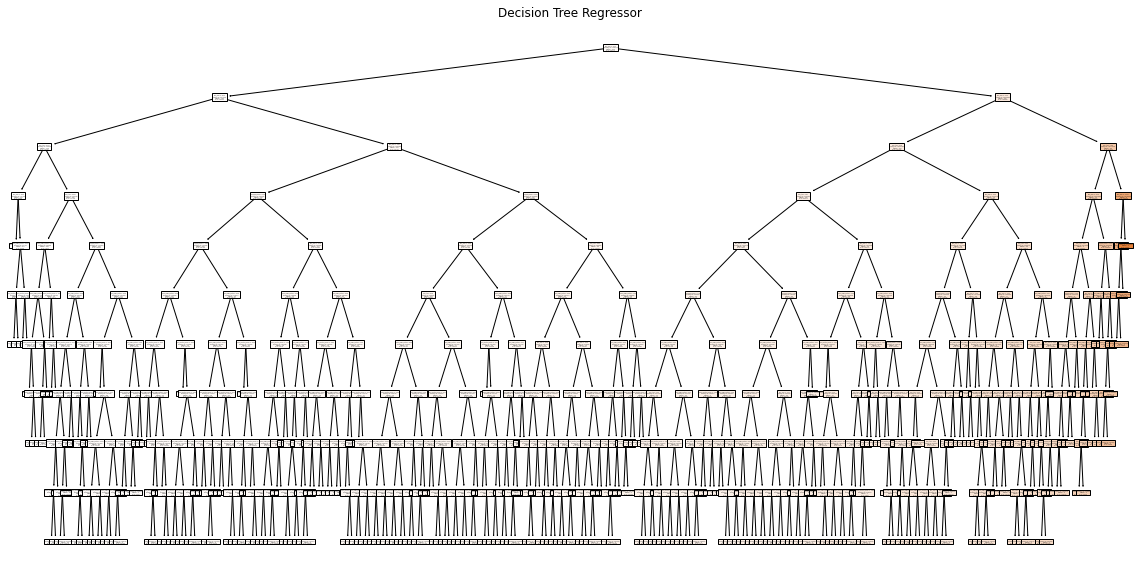

In [42]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)

# Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("="*50)
print("DECISION TREE REGRESSOR")
print("="*50)
print(f"MSE:  {mse_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
print(f"MAE:  {mae_dt:.4f}")
print(f"R²:   {r2_dt:.4f}")

# Feature importance
imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(imp_df)

# Visualize tree (optional)
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, feature_names=features, filled=True)
plt.title("Decision Tree Regressor")
plt.show()


In [43]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

# Base regressors: Random Forest + Gradient Boosting
base_regressors = [
    ('rf', RandomForestRegressor(
        n_estimators=50,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    )),
    ('gbt', GradientBoostingRegressor(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42
    ))
]

# Meta-regressor: Linear Regression
meta_regressor = LinearRegression()

# Stack ensemble
stack_reg = StackingRegressor(
    estimators=base_regressors,
    final_estimator=meta_regressor,
    cv=5
)

# Train
print("Training Stacking Ensemble...")
stack_reg.fit(X_train_scaled, y_train)

y_pred_stack = stack_reg.predict(X_test_scaled)

# Metrics
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("="*50)
print("STACKING ENSEMBLE (RF + GBT)")
print("="*50)
print(f"MSE:  {mse_stack:.4f}")
print(f"RMSE: {rmse_stack:.4f}")
print(f"MAE:  {mae_stack:.4f}")
print(f"R²:   {r2_stack:.4f}")


Training Stacking Ensemble...
STACKING ENSEMBLE (RF + GBT)
MSE:  3414.1885
RMSE: 58.4311
MAE:  29.6140
R²:   0.9786


In [44]:
# Train individual base models
rf_reg = RandomForestRegressor(n_estimators=50,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42)
gbt_reg = GradientBoostingRegressor(n_estimators=50,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42)

# Cell 8: Then fit them
rf_reg.fit(X_train_scaled, y_train)
gbt_reg.fit(X_train_scaled, y_train)

y_pred_rf = rf_reg.predict(X_test_scaled)
y_pred_gbt = gbt_reg.predict(X_test_scaled)

# Metrics for RF
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Metrics for GBT
mse_gbt = mean_squared_error(y_test, y_pred_gbt)
rmse_gbt = np.sqrt(mse_gbt)
mae_gbt = mean_absolute_error(y_test, y_pred_gbt)
r2_gbt = r2_score(y_test, y_pred_gbt)

print("="*50)
print("RANDOM FOREST REGRESSOR")
print("="*50)
print(f"MSE:  {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE:  {mae_rf:.4f}")
print(f"R²:   {r2_rf:.4f}")

print("\n" + "="*50)
print("GRADIENT BOOSTING REGRESSOR")
print("="*50)
print(f"MSE:  {mse_gbt:.4f}")
print(f"RMSE: {rmse_gbt:.4f}")
print(f"MAE:  {mae_gbt:.4f}")
print(f"R²:   {r2_gbt:.4f}")


RANDOM FOREST REGRESSOR
MSE:  4273.9577
RMSE: 65.3755
MAE:  29.9818
R²:   0.9733

GRADIENT BOOSTING REGRESSOR
MSE:  3501.8498
RMSE: 59.1764
MAE:  29.7497
R²:   0.9781


In [45]:
results_df = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'Stacking Ensemble'
    ],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_gbt, rmse_stack],
    'MAE': [mae_lr, mae_dt, mae_rf, mae_gbt, mae_stack],
    'R²': [r2_lr, r2_dt, r2_rf, r2_gbt, r2_stack]
}).sort_values('R²', ascending=False)

print("="*70)
print("MODEL COMPARISON - REGRESSION PERFORMANCE")
print("="*70)
print(results_df.to_string(index=False))

# Save to CSV
results_df.to_csv('regression_model_comparison.csv', index=False)


MODEL COMPARISON - REGRESSION PERFORMANCE
            Model      RMSE       MAE       R²
Linear Regression 46.451644 29.552891 0.986495
Stacking Ensemble 58.431058 29.613954 0.978632
Gradient Boosting 59.176429 29.749668 0.978083
    Decision Tree 60.080878 30.097593 0.977408
    Random Forest 65.375513 29.981836 0.973251


TIME SERIES MODEL

Total days: 135
Mean clicks: 1225.73

MAE: 254.92
RMSE: 339.93


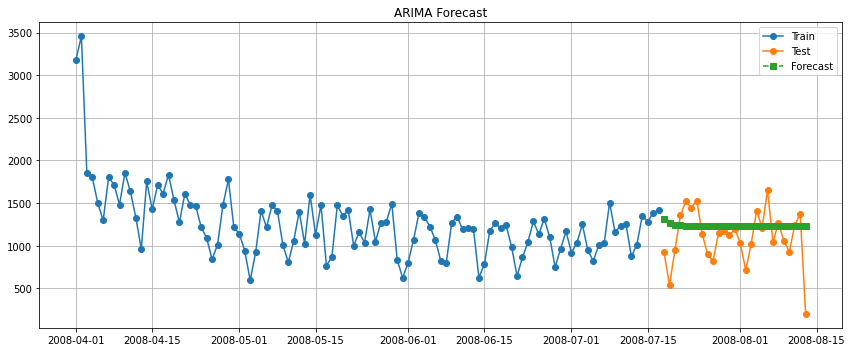


7-Day Forecast:
Day 1: 645 clicks
Day 2: 837 clicks
Day 3: 921 clicks
Day 4: 957 clicks
Day 5: 973 clicks
Day 6: 980 clicks
Day 7: 983 clicks


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv('clickstream_cleaned.csv')

# Create daily clicks
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
daily_clicks = df.groupby('date').size()

# Fill missing dates
date_range = pd.date_range(daily_clicks.index.min(), daily_clicks.index.max(), freq='D')
daily_clicks = daily_clicks.reindex(date_range, fill_value=0)

print(f"Total days: {len(daily_clicks)}")
print(f"Mean clicks: {daily_clicks.mean():.2f}")

# Split data
split_idx = int(len(daily_clicks) * 0.8)
train = daily_clicks[:split_idx]
test = daily_clicks[split_idx:]

# ARIMA Model
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast
forecast = arima_fit.forecast(steps=len(test))

# Metrics
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(f"\nMAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train.values, label='Train', marker='o')
plt.plot(test.index, test.values, label='Test', marker='o')
plt.plot(test.index, forecast, label='Forecast', linestyle='--', marker='s')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('forecast.png')
plt.show()

# Future 7-day forecast
final_model = ARIMA(daily_clicks, order=(1, 1, 1))
final_fit = final_model.fit()
future = final_fit.forecast(steps=7)

print("\n7-Day Forecast:")
for i, val in enumerate(future, 1):
    print(f"Day {i}: {val:.0f} clicks")


SARIMA MODEL

MAE: 187.97
RMSE: 280.91


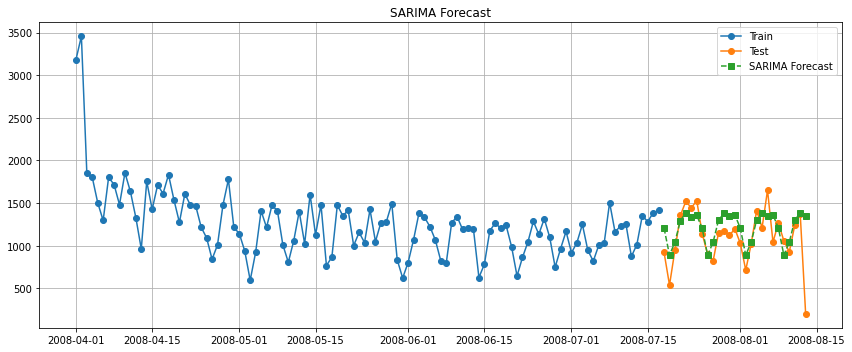


7-Day Forecast:
Day 1: 869 clicks
Day 2: 706 clicks
Day 3: 395 clicks
Day 4: 574 clicks
Day 5: 891 clicks
Day 6: 920 clicks
Day 7: 1006 clicks


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and prepare daily click data
df = pd.read_csv('clickstream_cleaned.csv')
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
daily_clicks = df.groupby('date').size()
date_range = pd.date_range(daily_clicks.index.min(), daily_clicks.index.max(), freq='D')
daily_clicks = daily_clicks.reindex(date_range, fill_value=0)

# Train-test split
split_idx = int(len(daily_clicks) * 0.8)
train = daily_clicks[:split_idx]
test = daily_clicks[split_idx:]

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit()

# Forecast test period
forecast = sarima_fit.forecast(steps=len(test))

# Evaluate
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(train.index, train.values, label='Train', marker='o')
plt.plot(test.index, test.values, label='Test', marker='o')
plt.plot(test.index, forecast, label='SARIMA Forecast', linestyle='--', marker='s')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit on full data and forecast next 7 days
final_model = SARIMAX(daily_clicks, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
final_fit = final_model.fit()
future = final_fit.forecast(steps=7)

print("\n7-Day Forecast:")
for i, val in enumerate(future, 1):
    print(f"Day {i}: {val:.0f} clicks")

Clicks per location:
location
1    34532
2    33383
3    21656
4    27377
5    27783
6    20743
Name: count, dtype: int64


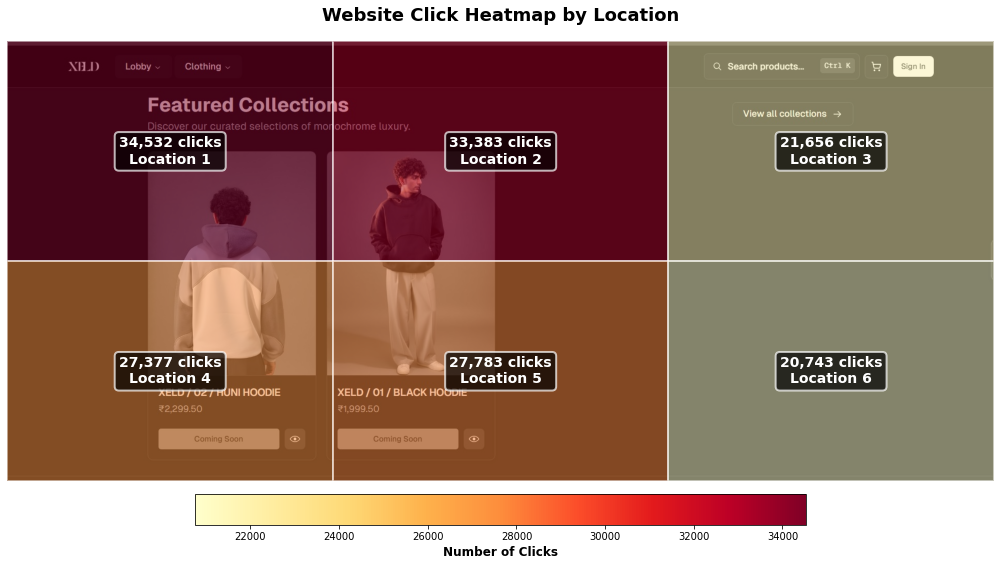


✓ Heatmap saved as 'website_click_heatmap.png'


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

# ====== CONFIGURATION ======
# Change this to your image path
IMAGE_PATH = 'XELD website.jpg'  # Replace with your actual image path

# Your clickstream data (replace with actual data loading)
# df = pd.read_csv('clickstream_cleaned.csv')

# ====== STEP 1: Calculate clicks per location ======
# Assuming you have a 'location' column with values 1-6
clicks_per_location = df['location'].value_counts().sort_index()

print("Clicks per location:")
print(clicks_per_location)

# ====== STEP 2: Define the 6 regions on the website ======
# The website is divided into 6 sections
# Adjust these coordinates based on your actual website layout
# Format: (x_start, y_start, width, height) as fractions of image size

# Common e-commerce layout: 2x3 grid
# Top row: locations 1, 2, 3
# Bottom row: locations 4, 5, 6

regions = {
    1: (0.00, 0.00, 0.33, 0.50),  # Top-left
    2: (0.33, 0.00, 0.34, 0.50),  # Top-middle
    3: (0.67, 0.00, 0.33, 0.50),  # Top-right
    4: (0.00, 0.50, 0.33, 0.50),  # Bottom-left
    5: (0.33, 0.50, 0.34, 0.50),  # Bottom-middle
    6: (0.67, 0.50, 0.33, 0.50),  # Bottom-right
}

# ====== STEP 3: Load and display the image with heatmap overlay ======

# Load the website image
img = Image.open(IMAGE_PATH)
img_width, img_height = img.size

# Create figure
fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(img)

# Normalize click counts to [0, 1] for color mapping
max_clicks = clicks_per_location.max()
min_clicks = clicks_per_location.min()

# Color map: use 'Reds' or 'YlOrRd' for heatmap effect
cmap = plt.cm.YlOrRd

# ====== STEP 4: Draw heatmap rectangles ======
for location_id, (x_frac, y_frac, w_frac, h_frac) in regions.items():
    # Convert fractional coordinates to pixel coordinates
    x = x_frac * img_width
    y = y_frac * img_height
    width = w_frac * img_width
    height = h_frac * img_height
    
    # Get click count for this location
    clicks = clicks_per_location.get(location_id, 0)
    
    # Normalize to [0, 1]
    normalized_clicks = (clicks - min_clicks) / (max_clicks - min_clicks) if max_clicks > min_clicks else 0.5
    
    # Get color from colormap
    color = cmap(normalized_clicks)
    
    # Draw semi-transparent rectangle
    rect = Rectangle(
        (x, y), width, height,
        linewidth=2,
        edgecolor='white',
        facecolor=color,
        alpha=0.5  # Transparency level (0=fully transparent, 1=opaque)
    )
    ax.add_patch(rect)
    
    # Add click count text in center of region
    text_x = x + width / 2
    text_y = y + height / 2
    ax.text(
        text_x, text_y,
        f'{clicks:,} clicks\nLocation {location_id}',
        fontsize=14,
        fontweight='bold',
        color='white',
        ha='center',
        va='center',
        bbox=dict(boxstyle='round', facecolor='black', alpha=0.7, edgecolor='white', linewidth=2)
    )

# Remove axes
ax.axis('off')

# Add title
plt.title('Website Click Heatmap by Location', fontsize=18, fontweight='bold', pad=20)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_clicks, vmax=max_clicks))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02, fraction=0.046)
cbar.set_label('Number of Clicks', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('website_click_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Heatmap saved as 'website_click_heatmap.png'")
